In [1]:
import boto3
import io
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
rekognition = boto3.client('rekognition', region_name='ap-south-1')  # Change region if needed

In [3]:
image_path = 'kitten.png'
with open(image_path, 'rb') as image:
    img_bytes = image.read()

In [4]:
response = rekognition.detect_labels(
    Image={'Bytes': img_bytes},
    MaxLabels=10,
    MinConfidence=70
)

In [5]:
print("Detected labels:")
for label in response['Labels']:
    print(f"{label['Name']} - Confidence: {label['Confidence']:.2f}%")

Detected labels:
Animal - Confidence: 99.94%
Cat - Confidence: 99.94%
Kitten - Confidence: 99.94%
Mammal - Confidence: 99.94%
Pet - Confidence: 99.94%
Electronics - Confidence: 76.99%
Hardware - Confidence: 76.99%


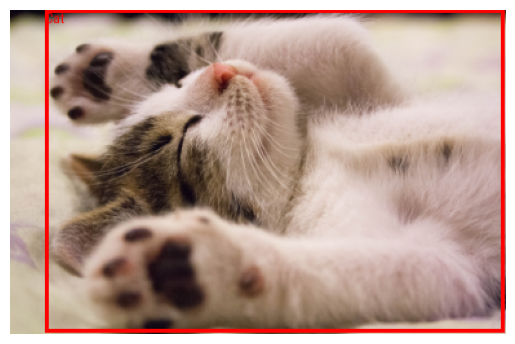

In [6]:
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

for label in response['Labels']:
    for instance in label.get('Instances', []):
        box = instance['BoundingBox']
        width, height = image.size
        left = width * box['Left']
        top = height * box['Top']
        right = left + width * box['Width']
        bottom = top + height * box['Height']
        draw.rectangle([left, top, right, bottom], outline='red', width=3)
        draw.text((left, top), label['Name'], fill='red')

plt.imshow(image)
plt.axis('off')
plt.show()